In [1]:
# test ak
import akshare as ak

df = ak.fund_etf_spot_em().sort_values(by="基金折价率", ascending=False).head(20)

df.to_csv("./data/etf20.csv", index=False, encoding="utf-8-sig")


  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
# get and save gold price data

import akshare as ak

spot_hist_sge_df = ak.spot_hist_sge(symbol='Au99.99')

spot_hist_sge_df.to_csv("./data/gold.csv", index=False, encoding="utf-8-sig")



Date from 2016 to 2025
Total years: 10
Total invested: ¥120000.00
Portfolio value: ¥216161.12
Profit: ¥96161.12 (8.01%)


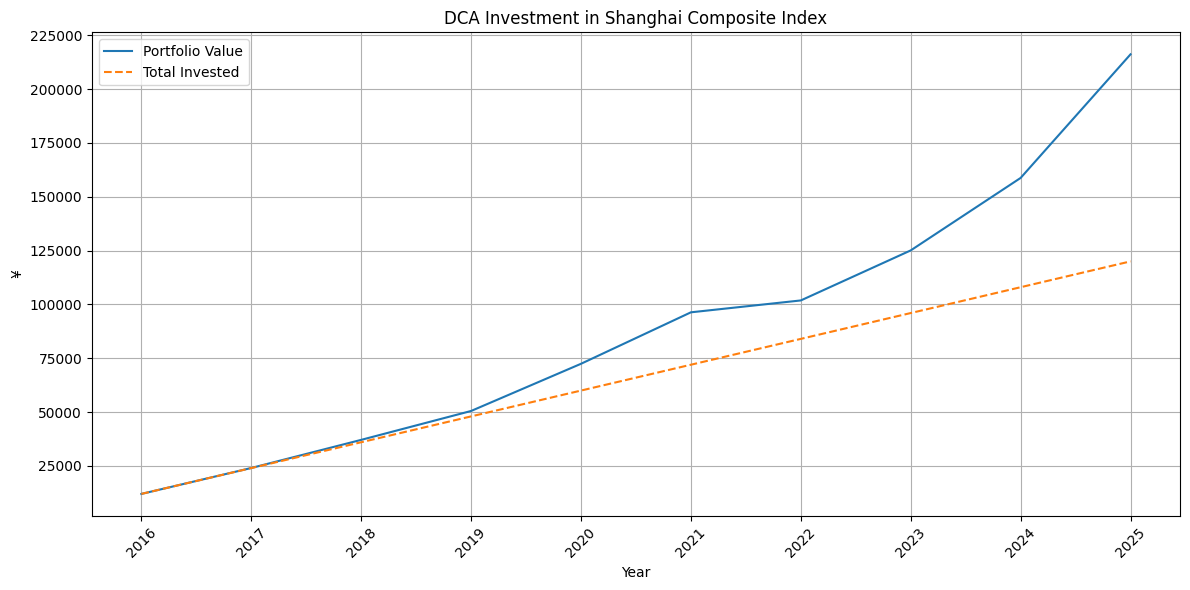

In [ ]:
# Gold DCA
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./data/gold.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Extract year for grouping
df['year'] = df['date'].dt.to_period('Y')

# Get the first trading day of each year
yearly_df = df.groupby('year').first().reset_index()


# DCA logic
investment_per_month = 12000  # ¥12000 per month
yearly_df['shares_bought'] = investment_per_month / yearly_df['close']
yearly_df['total_shares'] = yearly_df['shares_bought'].cumsum()
yearly_df['total_invested'] = investment_per_month * (yearly_df.index + 1)

# Use latest price to calculate current value
# latest_price = df['close'].iloc[-1]
yearly_df['portfolio_value'] = yearly_df['total_shares'] * yearly_df['close']

# Final result
total_invested = yearly_df['total_invested'].iloc[-1]
portfolio_value = yearly_df['portfolio_value'].iloc[-1]
profit = portfolio_value - total_invested
total_year = yearly_df['year'].size

print(f"Date from {yearly_df['year'][0]} to {yearly_df['year'].iloc[-1]}")
print(f"Total years: {total_year}")
print(f"Total invested: ¥{total_invested:.2f}")
print(f"Portfolio value: ¥{portfolio_value:.2f}")
print(f"Profit: ¥{profit:.2f} ({profit / total_invested / total_year:.2%})")

# Save to CSV
yearly_df.to_csv("./data/gold_years.csv", index=False, encoding="utf-8-sig")
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_df['year'].astype(str), yearly_df['portfolio_value'], label='Portfolio Value')
plt.plot(yearly_df['year'].astype(str), yearly_df['total_invested'], label='Total Invested', linestyle='--')
plt.title("DCA Investment in Shanghai Composite Index")
plt.xlabel("Year")
plt.ylabel("¥")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()